In [1]:
# Neezcha Dinman
# ICS 483
# Homework 2

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
####  5  ####

In [4]:
# 5a
# write your own function eg. im_heq = my_hist_equalization(gray_image, n_bins)
# each level is going to occur at regular frequency 

In [8]:
# import image > histogram > cum sum > normalise cum sum > use ncs to modify origional image > display 
# flat array image will act as index to look ip ncs values found 

In [30]:
def my_hist_equalization(gray_image, n_bins):
    
    # import image, make it a flat aray
    img = mpimg.imread(gray_image)
    imgArr = np.array(img)
    imgFlat = imgArr.flatten()
    
    #array, bin sizes 0
    histogram = np.zeros(n_bins) 
    
    # sum up counts of pixels
    for pixel in imgFlat:
        histogram[pixel] += 1
        
    # return histogram #TEST
    
    # cumlative sum
    histogram = iter(histogram)
    b = [next(histogram)]
    for i in histogram:
        b.append(b[-1] + i)
        
   # return np.array(b) #TEST

    #normalize cum sum 0-1 
    cs = np.array(b)
    nj = (cs - cs.min()) * 1
    N = cs.max() - cs.min()
    cs = nj / N
    cs.astype('uint8') #can't use floating point values in images   
    
    # value from cum sum for every index in flat
    imgNew = cs[imgFlat] 
    imgNewShape = np.reshape(imgNew, img.shape)
    
    # DISPALY OLD-HIST, NEW-HIST
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
        
    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Origional Image', fontsize=15)

    fig.add_subplot(2,2,2)
    plt.hist(imgFlat, bins=n_bins)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Frequencey', fontsize=16)
    
    fig.add_subplot(2,2,3)
    plt.imshow(imgNewShape, cmap='gray')
    plt.title('Histogram Equalization', fontsize=15)

    fig.add_subplot(2,2,4)
    plt.hist(imgNew, bins=n_bins)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Frequencey', fontsize=16)

    plt.show(block=True)
    fig.savefig("landsat_hist_equalized.png")
    
    return fig

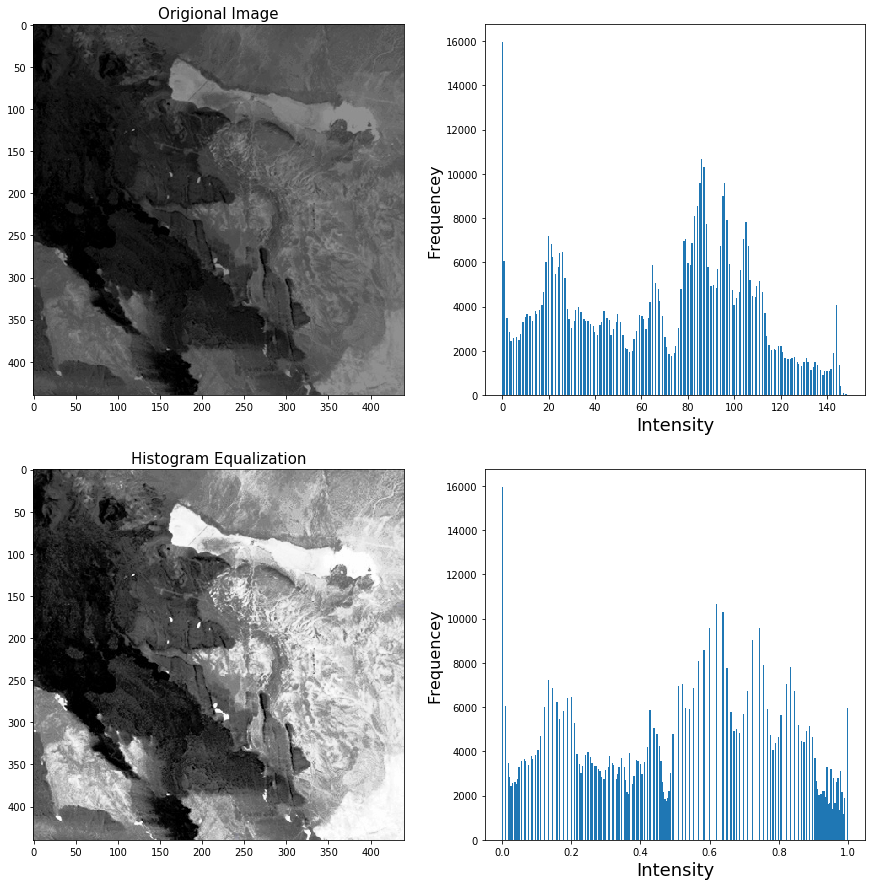

In [31]:
landHist = my_hist_equalization('landsat.jpg', 256)

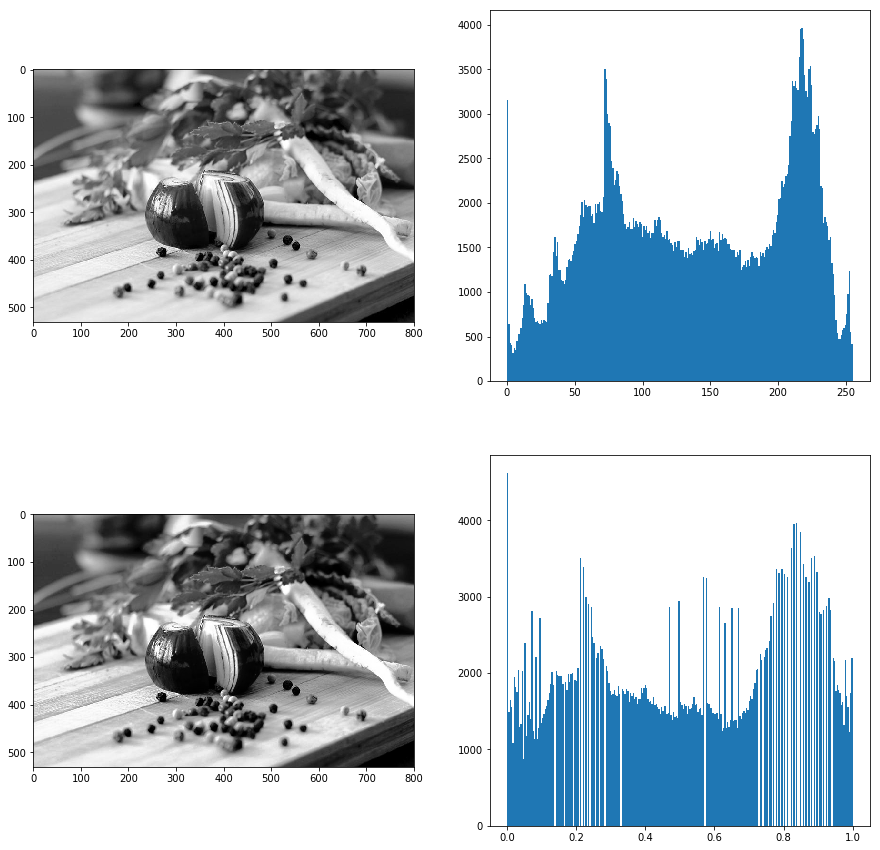

In [15]:
convHist = my_hist_equalization('conv_test.jpg', 256)

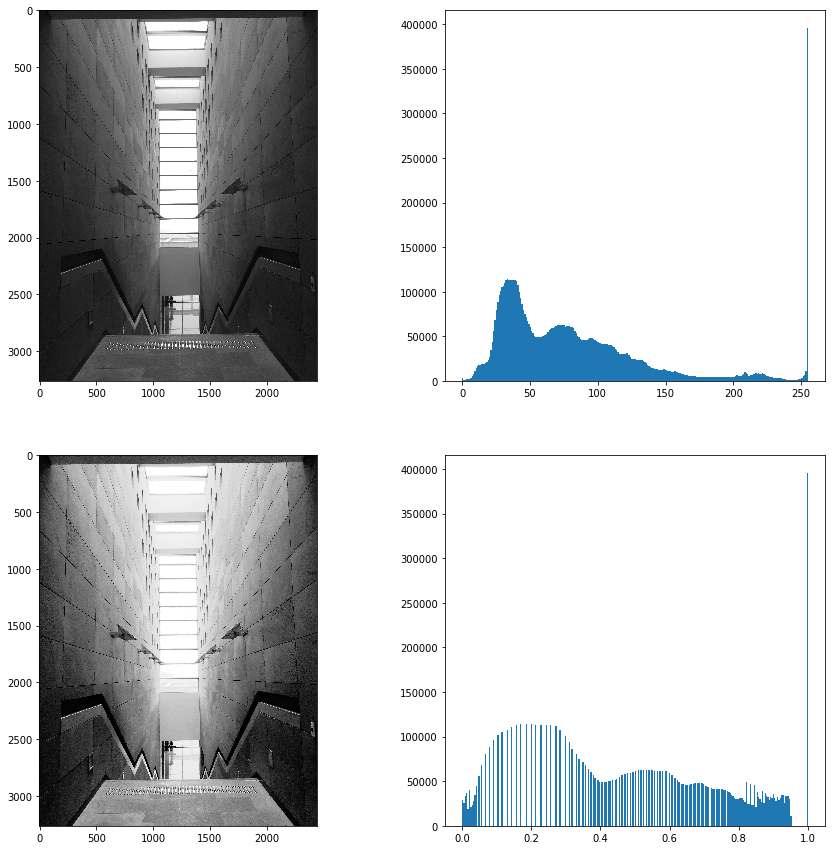

In [16]:
wallHist = my_hist_equalization('wall_gray.jpg', 256)